# **Pytorch Basic 102 AI4I 2020 Predictive Maintenance -  Machine Failure and Type Prediction**

This notebook provides a model build in Pytorch for predicting machine failures and their types using the AI4I 2020 Predictive Maintenance Dataset.

## **Table of Contents**

0. [PyTorch Basics Exercises](#pytorch-basics)
1. [Import Libraries](#import-libraries)
2. [Load the Dataset](#load-the-dataset)
3. [Exploratory Data Analysis (EDA)](#eda)
4. [Data Preprocessing](#data-preprocessing)
5. [Split the Data into Training and Testing Sets](#split-data)
6. [Balancing the Training Data with SMOTE](#balancing-training-data)
7. [Calculating Class Weights](#calculating-class-weights)
8. [Feature Scaling](#feature-scaling)
9. [Dimensionality Reduction with PCA](#pca)
10. [Prepare Data for PyTorch](#prepare-data)
11. [Define the Neural Network](#define-network)
12. [Train the Neural Network](#train-network)
13. [Final Evaluation](#final-evaluation)
14. [Interactive GUI for Predictions](#interactive-gui)
15. [Conclusion](#conclusion)

<a name="pytorch-basics"></a>
## **0. PyTorch Basics Exercises**

In this section, we'll cover some fundamental PyTorch operations that are essential for working with tensors and building neural networks. Understanding these basics is crucial for effective use of PyTorch in machine learning tasks.

### **Exercise 1: Transpose of a Tensor**

The transpose operation is vital in tensor manipulations, especially when dealing with matrix operations in neural networks.

**Task:** Create a 2D tensor and compute its transpose using PyTorch.

In [3]:
# Import torch
import torch

# Create a 2D tensor
tensor_2d = torch.tensor([[1,2,3],[1,2,3]])
print("Original Tensor:\n", tensor_2d)

# Compute its transpose
tensor_transposed = tensor_2d.t()
print("\nTransposed Tensor:\n", tensor_transposed)

Original Tensor:
 tensor([[1, 2, 3],
        [1, 2, 3]])

Transposed Tensor:
 tensor([[1, 1],
        [2, 2],
        [3, 3]])


### **Exercise 2: Enumerate over DataLoader**

Enumerating over a DataLoader is common when iterating over batches during training.

**Task:** Create a simple DataLoader and use `enumerate` to loop over batches.

In [6]:
#Create a simple dataset
from torch.utils.data import DataLoader, TensorDataset

data = torch.arange(1, 11)
print("\nData:\n", data)
targets = data * 2
print("\nTargets:\n", targets)

# Create a TensorDataset and DataLoader
# Note: The TensorDataset class is a simple wrapper around the Tensor class
# that provides a way to create a dataset from one or more tensors.
# allows us to combine data and target tensors into a single dataset.
# The DataLoader class is used to load the data from the dataset in batches.
# Unsqueeze means adding a dimension of size one at the specified position.
# example unsqueeze(1) will add a dimension of size one at position 1
# example unsqueeze(0) will add a dimension of size one at position 0
# example unsqueeze(-1) will add a dimension of size one at the last position
# example unsqueeze(-2) will add a dimension of size one at the second last position
dataset = TensorDataset(data.unsqueeze(1), targets.unsqueeze(1))
print("\nDataset:\n", dataset.tensors)
loader = DataLoader(dataset, batch_size=3)

# Enumerate over DataLoader
for batch_idx, (batch_data, batch_targets) in enumerate(loader):
    print(f"Batch {batch_idx}: Data = {batch_data.squeeze().tolist()}, Targets = {batch_targets.squeeze().tolist()}")


Data:
 tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Targets:
 tensor([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

Dataset:
 (tensor([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]), tensor([[ 2],
        [ 4],
        [ 6],
        [ 8],
        [10],
        [12],
        [14],
        [16],
        [18],
        [20]]))
Batch 0: Data = [1, 2, 3], Targets = [2, 4, 6]
Batch 1: Data = [4, 5, 6], Targets = [8, 10, 12]
Batch 2: Data = [7, 8, 9], Targets = [14, 16, 18]
Batch 3: Data = 10, Targets = 20


### **Exercise 3: Normalize a Tensor**

Normalization is crucial for speeding up the training process and improving convergence.

**Task:** Normalize a given tensor along a specified dimension.

In [7]:
# Create a tensor
tensor = torch.rand(5, 3)
print("Original Tensor:\n", tensor)

# Normalize the tensor along dimension 0
# The p parameter specifies the order of the norm.
# When p=2, the norm is the Euclidean norm.
# When p=1, the norm is the Manhattan norm.
# When p=0, the norm is the Infinity norm.
# The dim parameter specifies the dimension along which the normalization is performed.
# dim=0 means that the norm is computed along the rows.

tensor_normalized = torch.nn.functional.normalize(tensor, p=2, dim=0)
print("\nNormalized Tensor (along dim=0):\n", tensor_normalized)

Original Tensor:
 tensor([[0.1954, 0.5943, 0.7682],
        [0.2014, 0.1342, 0.7529],
        [0.3284, 0.1441, 0.2709],
        [0.9246, 0.4921, 0.8210],
        [0.6020, 0.4776, 0.6129]])

Normalized Tensor (along dim=0):
 tensor([[0.1649, 0.6401, 0.5087],
        [0.1700, 0.1445, 0.4986],
        [0.2772, 0.1552, 0.1794],
        [0.7803, 0.5299, 0.5437],
        [0.5081, 0.5143, 0.4059]])


### **Exercise 4: Concatenate Tensors**

Concatenation is used to combine tensors along a specific dimension.

**Task:** Concatenate two tensors along the first dimension.

In [8]:
# Create two tensors
tensor_a = torch.tensor([[1, 2], [3, 4]])
tensor_b = torch.tensor([[5, 6]])

# Concatenate along the first dimension (rows)
tensor_concat = torch.cat((tensor_a, tensor_b), dim=0)
print("Concatenated Tensor:\n", tensor_concat)

Concatenated Tensor:
 tensor([[1, 2],
        [3, 4],
        [5, 6]])


### **Exercise 5: Reshape a Tensor**

Reshaping is often necessary to prepare data for neural network layers.

**Task:** Reshape a tensor of shape (2, 3) to shape (3, 2).

In [10]:
# Create a tensor
tensor = torch.tensor([[1,2,3],[1,2,3]])
print("Original Tensor Shape:", tensor.shape)

# Reshape the tensor to (3, 2)
tensor_reshaped = tensor.view(3, 2)
print("Reshaped Tensor:\n", tensor_reshaped)
print("Reshaped Tensor Shape:", tensor_reshaped.shape)

Original Tensor Shape: torch.Size([2, 3])
Reshaped Tensor:
 tensor([[1, 2],
        [3, 1],
        [2, 3]])
Reshaped Tensor Shape: torch.Size([3, 2])


These exercises cover fundamental PyTorch operations that are essential when working with tensors and building neural networks. Mastery of these basics will greatly assist in understanding and implementing more complex models.

<a name="import-libraries"></a>
## **1. Import Libraries**

In [1]:
!pip install imblearn
!pip install seaborn
!pip install ipywidgets
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

# Balancing the dataset
from imblearn.over_sampling import SMOTE

# PyTorch for neural network
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Interactive GUI
import ipywidgets as widgets
from IPython.display import display

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

<a name="load-the-dataset"></a>
## **2. Load the Dataset**

Ensure the dataset `ai4i2020.csv` is in your working directory.

In [5]:
# Mount Google Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Define the path to the dataset in Google Drive
data_path = '/content/drive/My Drive/DLY3S1/ai4i2020.csv'
data = pd.read_csv(data_path)

Mounted at /content/drive


<a name="eda"></a>
## **3. Exploratory Data Analysis (EDA)**

### **3.1. Overview of the Dataset**

In [6]:
# Display the first five rows
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### **3.2. Check for Missing Values**

In [7]:
# Check for missing values
data.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
TWF,0


### **3.3. Statistical Summary**

In [8]:
# Statistical summary of numerical features
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


### **3.4. Target Variable Distribution**

In [9]:
# Distribution of 'Machine failure' and 'Type'
print("Machine failure distribution:")
print(data['Machine failure'].value_counts())
print("\nType distribution:")
print(data['Type'].value_counts())

Machine failure distribution:
Machine failure
0    9661
1     339
Name: count, dtype: int64

Type distribution:
Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


### **3.5. Visualizations**

#### **Histograms of Numerical Features**

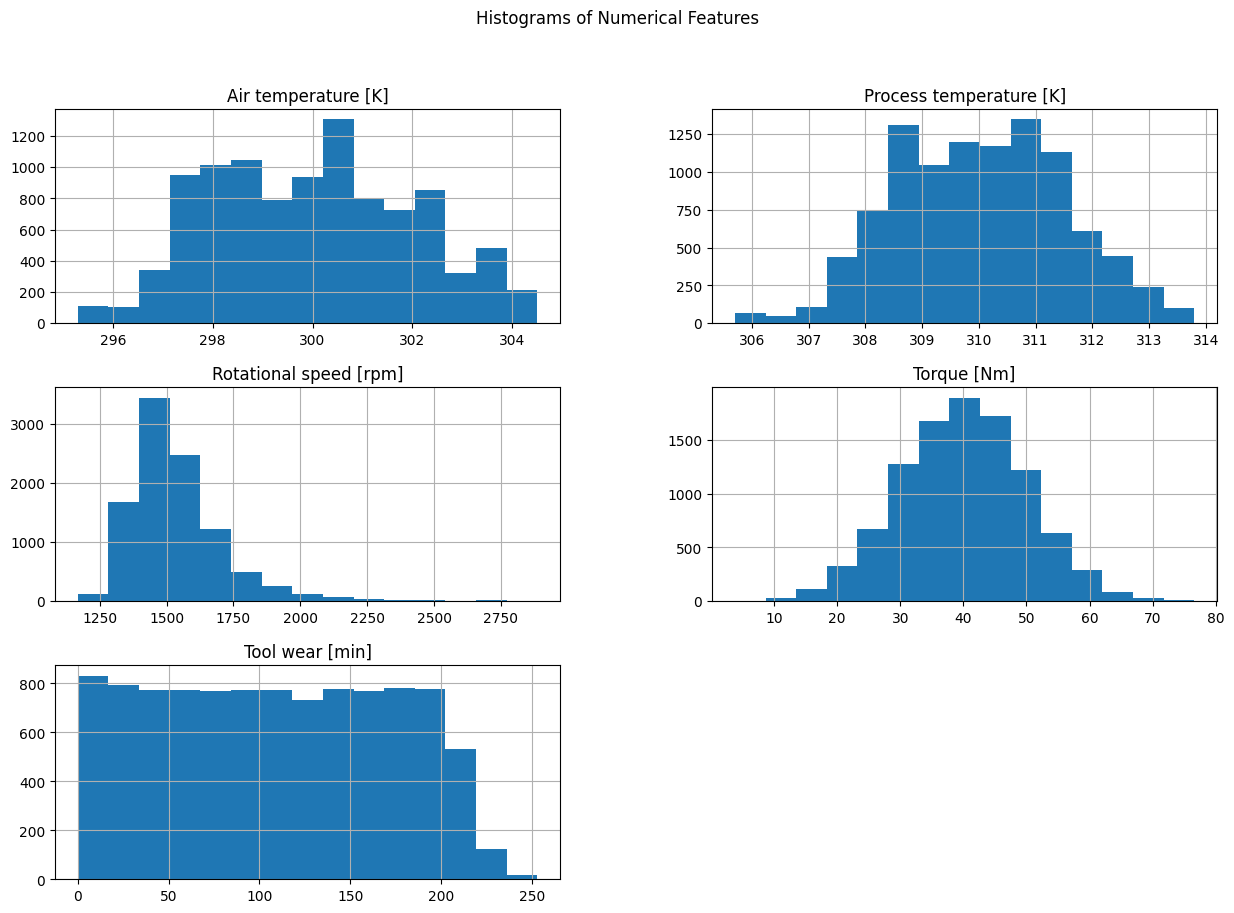

In [32]:
num_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
            'Torque [Nm]', 'Tool wear [min]']

data[num_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

<a name="data-preprocessing"></a>
## **4. Data Preprocessing**

### **4.1. Drop Unnecessary Columns**

In [10]:
# Drop 'UDI' and 'Product ID' as they are identifiers
data = data.drop(['UDI', 'Product ID'], axis=1)

### **4.2. Create Target Variable**

We'll create a single target variable that combines 'Machine failure' and 'Type' into a multi-class target.

- **Class 0**: No failure
- **Class 1**: Failure of Type L
- **Class 2**: Failure of Type M
- **Class 3**: Failure of Type H

In [11]:
# Map 'Type' to numerical values
type_mapping = {'L': 1, 'M': 2, 'H': 3}
data['Type_num'] = data['Type'].map(type_mapping)

# Create the target variable
data['Target'] = data.apply(
    lambda row: row['Type_num'] if row['Machine failure'] == 1 else 0, axis=1)

# Drop 'Type_num' and 'Type' as they are now encoded in 'Target'
data = data.drop(['Type', 'Type_num'], axis=1)

In [18]:
data.head()


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Target
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0


### **4.3. Feature and Target Separation**

In [16]:
# Features (exclude 'Machine failure' and 'Target')
X = data.drop(['Machine failure', 'Target'], axis=1)

# Target variable
y = data['Target']



<a name="split-data"></a>
## **5. Split the Data into Training and Testing Sets**

In [17]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 8000 samples
Testing set size: 2000 samples


<a name="balancing-training-data"></a>
## **6. Balancing the Training Data with SMOTE**

In [20]:
print(X_train.dtypes)

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("\nClass distribution after applying SMOTE to the training set:")
print(y_train_resampled.value_counts())

Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

Class distribution after applying SMOTE to the training set:
Target
0    7729
1    7729
2    7729
3    7729
Name: count, dtype: int64


<a name="calculating-class-weights"></a>
## **7. Calculating Class Weights**

In [22]:
# Calculate class weights based on the frequency of each class
class_sample_count = np.array([len(np.where(y_train_resampled == t)[0]) for t in np.unique(y_train_resampled)])
weight = 1. / class_sample_count
samples_weight = np.array([weight[t] for t in y_train_resampled])

# Normalize class weights
class_weights = torch.tensor(weight / weight.sum(), dtype=torch.float32).to('cuda' if torch.cuda.is_available() else 'cpu')

print("Class Weights:", class_weights)

Class Weights: tensor([0.2500, 0.2500, 0.2500, 0.2500], device='cuda:0')


<a name="feature-scaling"></a>
## **8. Feature Scaling**

We will perform feature scaling using PyTorch tensors instead of using Scikit-learn's `StandardScaler`.

In [23]:
# Convert training data to tensors
X_train_tensor = torch.tensor(X_train_resampled.values, dtype=torch.float32)

# Compute mean and standard deviation
mean = X_train_tensor.mean(dim=0)
std = X_train_tensor.std(dim=0)

# Normalize the training data
X_train_normalized = (X_train_tensor - mean) / std

# Normalize the test data
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
X_test_normalized = (X_test_tensor - mean) / std

<a name="pca"></a>
## **9. Covariance matrix**


<Axes: >

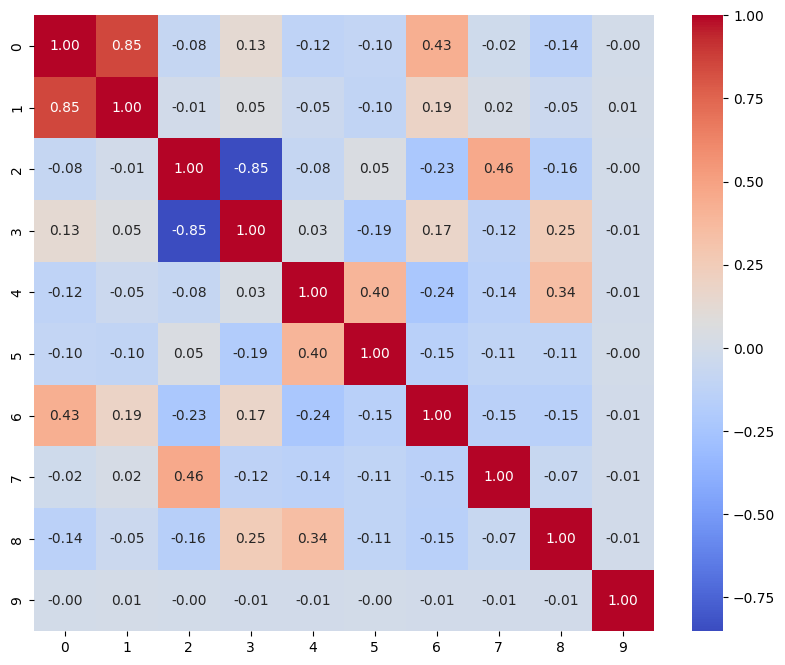

In [25]:
# Compute covariance matrix
cov_matrix = torch.mm(X_train_normalized.T, X_train_normalized) / (X_train_normalized.shape[0]-1)
# Show the more correlated columns
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm')





<a name="prepare-data"></a>
## **10. Prepare Data for PyTorch**

In [26]:
# Convert targets to tensors
y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_normalized, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

<a name="define-network"></a>
## **11. Define the Neural Network**

In [27]:
# Define the neural network
class Net(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Net, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        return self.layers(x)

<a name="train-network"></a>
## **12. Train the Neural Network**

In [28]:
# Initialize model, loss function, optimizer
input_size = X_train_normalized.shape[1]
num_classes = len(y.unique())
model = Net(input_size, num_classes)

# Move model to device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
X_test_pca = X_test_normalized.to(device)
y_test_tensor = y_test_tensor.to(device)

# Define loss function with class weights
criterion = nn.CrossEntropyLoss(weight=class_weights)

optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Train the model
epochs = 100
best_accuracy = 0
patience = 10
trigger_times = 0

for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    # Evaluate on the test set
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_pca)
        _, predicted = torch.max(outputs.data, 1)
        accuracy = accuracy_score(y_test_tensor.cpu(), predicted.cpu())

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")

    # Early stopping based on accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        trigger_times = 0
        # Save the best model
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print('Early stopping!')
            break

Epoch 1/100, Loss: 1.5041, Accuracy: 0.9055
Epoch 2/100, Loss: 1.2505, Accuracy: 0.9275
Epoch 3/100, Loss: 0.5787, Accuracy: 0.9170
Epoch 4/100, Loss: 0.4712, Accuracy: 0.9175
Epoch 5/100, Loss: 0.9630, Accuracy: 0.9205
Epoch 6/100, Loss: 1.1128, Accuracy: 0.9175
Epoch 7/100, Loss: 0.9585, Accuracy: 0.9275
Epoch 8/100, Loss: 1.0111, Accuracy: 0.9105
Epoch 9/100, Loss: 1.5042, Accuracy: 0.9290
Epoch 10/100, Loss: 0.8879, Accuracy: 0.9335
Epoch 11/100, Loss: 1.2507, Accuracy: 0.9340
Epoch 12/100, Loss: 0.9372, Accuracy: 0.9285
Epoch 13/100, Loss: 0.9265, Accuracy: 0.9180
Epoch 14/100, Loss: 0.5671, Accuracy: 0.9260
Epoch 15/100, Loss: 1.4309, Accuracy: 0.9175
Epoch 16/100, Loss: 0.5767, Accuracy: 0.9340
Epoch 17/100, Loss: 0.7948, Accuracy: 0.9330
Epoch 18/100, Loss: 0.6859, Accuracy: 0.9250
Epoch 19/100, Loss: 0.6600, Accuracy: 0.9340
Epoch 20/100, Loss: 1.4217, Accuracy: 0.9180
Epoch 21/100, Loss: 0.7524, Accuracy: 0.9245
Early stopping!


<a name="final-evaluation"></a>
## **13. Final Evaluation**

In [29]:
# Load the best model
model.load_state_dict(torch.load('best_model.pth'))

# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X_test_pca)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = accuracy_score(y_test_tensor.cpu(), predicted.cpu())
    print(f"Test Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    target_names = ['No Failure', 'Failure Type L', 'Failure Type M', 'Failure Type H']
    print(classification_report(y_test_tensor.cpu(), predicted.cpu(), target_names=target_names))

Test Accuracy: 0.9340

Classification Report:
                precision    recall  f1-score   support

    No Failure       1.00      0.95      0.98      1932
Failure Type L       0.70      0.49      0.57        47
Failure Type M       0.08      0.29      0.12        17
Failure Type H       0.02      0.25      0.03         4

      accuracy                           0.93      2000
     macro avg       0.45      0.50      0.43      2000
  weighted avg       0.98      0.93      0.96      2000



<a name="interactive-gui"></a>
## **14. Interactive GUI for Predictions**

### **14.1. Create Input Widgets**

In [33]:
# List of feature names
feature_names = X.columns.tolist()

# Create widgets for each feature
widgets_dict = {}
for feature in feature_names:
    if feature in num_cols:
        widgets_dict[feature] = widgets.FloatText(
            description=feature,
            value=float(data[feature].mean())
        )
    else:
        widgets_dict[feature] = widgets.Dropdown(
            description=feature,
            options=[0, 1],
            value=0
        )

### **14.2. Define Prediction Function**

In [34]:
def predict_button_clicked(b):
    # Collect input data
    input_data = []
    for feature in feature_names:
        value = widgets_dict[feature].value
        input_data.append(float(value))

    input_tensor = torch.tensor([input_data], dtype=torch.float32).to(device)

    # Normalize the input data
    mean_cuda = mean.to(device)
    std_cuda = std.to(device)
    input_normalized = (input_tensor - mean_cuda) / std_cuda



    # Predict
    model.eval()
    with torch.no_grad():
        output = model(input_normalized)
        _, predicted = torch.max(output.data, 1)
        predicted_class = predicted.cpu().item()

    # Map predicted class to output
    if predicted_class == 0:
        print("\nPrediction: No machine failure expected.")
    else:
        failure_types = {1: 'Type L', 2: 'Type M', 3: 'Type H'}
        print(f"\nPrediction: Machine failure expected. Failure Type: {failure_types[predicted_class]}")

### **14.3. Create Predict Button**

In [35]:
predict_button = widgets.Button(description="Predict")
predict_button.on_click(predict_button_clicked)

### **14.4. Display Widgets and Button**

In [36]:
input_widgets = widgets.VBox(list(widgets_dict.values()))
display(input_widgets, predict_button)

Button(description='Predict', style=ButtonStyle())


Prediction: No machine failure expected.

Prediction: No machine failure expected.

Prediction: No machine failure expected.

Prediction: No machine failure expected.

Prediction: No machine failure expected.

Prediction: Machine failure expected. Failure Type: Type L

Prediction: Machine failure expected. Failure Type: Type L

Prediction: Machine failure expected. Failure Type: Type L



**Thank you for exploring this notebook!**